In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("../data-source/dataset.csv")
df['交易时间'] = pd.to_datetime(df['交易时间'], format='%Y/%m/%d %H:%M:%S')
df['金额(元)'] = pd.to_numeric(df['金额(元)'])

df['月度'] = df['交易时间'].dt.strftime('%Y-%m')

def process_amount(row):
    amount = row['金额(元)']
    if row['收/支'] == '收入':
        return amount
    else:
        return -amount

df['开销'] = df.apply(process_amount, axis=1)

df.head()


,交易时间,类型,金额(元),收/支,交易来源,交易对方,商品名称,备注,月度,开销
0,2018-07-12 11:04:00,交通,368.5,支出,支付宝,中国铁路网络有限公司,火车票,NaN,2018-07,-368.5
1,2018-07-17 23:32:00,住房,1000.0,支出,微信支付,布丁奶奶,转账备注:房租押金,NaN,2018-07,-1000.0
2,2018-07-19 07:07:00,住房,1000.0,收入,微信支付,/,转账备注:房租押金,NaN,2018-07,1000.0
3,2018-07-19 14:07:00,交通,50.0,支出,支付宝,易办事深圳通充值,易办事深圳通充值,NaN,2018-07,-50.0
4,2018-07-19 17:12:00,住房,6500.0,支出,微信支付,布丁奶奶,收款方备注:二维码收款,NaN,2018-07,-6500.0


In [64]:
table_payment = pd.pivot_table(df, index='月度', columns='类型', values='开销', aggfunc='sum')
table_payment.fillna(0, inplace=True)

In [65]:
table_payment["月结余"] = table_payment.sum(axis=1)
table_payment["月支出"] = table_payment["月结余"] - table_payment['工资'] - table_payment['交易']

table_payment

类型,交易,交通,人情,住房,娱乐,工资,旅行,生活,礼物,餐饮,月结余,月支出
月度,,,,,,,,,,,,
2018-07,0.00,-447.51,-229.17,-8859.00,-5.99,0.00,0.00,-79.90,0.00,-129.50,-9751.07,-9751.07
2018-08,0.00,-40.28,-117.92,-2177.41,-50.00,11826.03,0.00,-336.17,0.00,-799.49,8304.76,-3521.27
2018-09,0.00,-801.60,-61.73,-2100.00,-407.50,11291.75,-190.00,-374.32,-5438.00,-1000.61,917.99,-10373.76
2018-10,0.00,-259.60,204.19,-2138.50,-199.00,12004.10,-5404.03,-92.56,-107.61,-451.40,3555.59,-8448.51
2018-11,0.00,-60.95,1991.60,-2138.50,-5577.20,12004.10,0.00,-518.50,-1611.00,-922.94,3166.61,-8837.49
2018-12,0.00,-58.05,-235.96,-2137.10,-169.73,12004.10,-672.94,-55.00,0.00,-924.40,7750.92,-4253.18
2019-01,114.35,-871.50,434.67,-2100.00,-190.48,12326.80,-193.20,-92.90,0.00,-1135.40,8292.34,-4148.81
2019-02,0.00,-126.56,71.86,-2141.30,-80.00,21854.90,-535.50,-377.00,-1445.60,-624.60,16596.20,-5258.70
2019-03,0.00,-13.40,-29.08,-2100.00,-554.35,12467.91,-729.15,-122.10,0.00,-918.50,8001.33,-4466.58


In [66]:
# 定义应用于总支出列的样式函数
def color_render(val):
    colors = np.where(val >= -5000, 'color: green', np.where(val <= -7000, 'color: red', ''))
    return colors

table_styled = table_payment.style.apply(color_render, subset=["月支出"])

<AxesSubplot:xlabel='类型'>

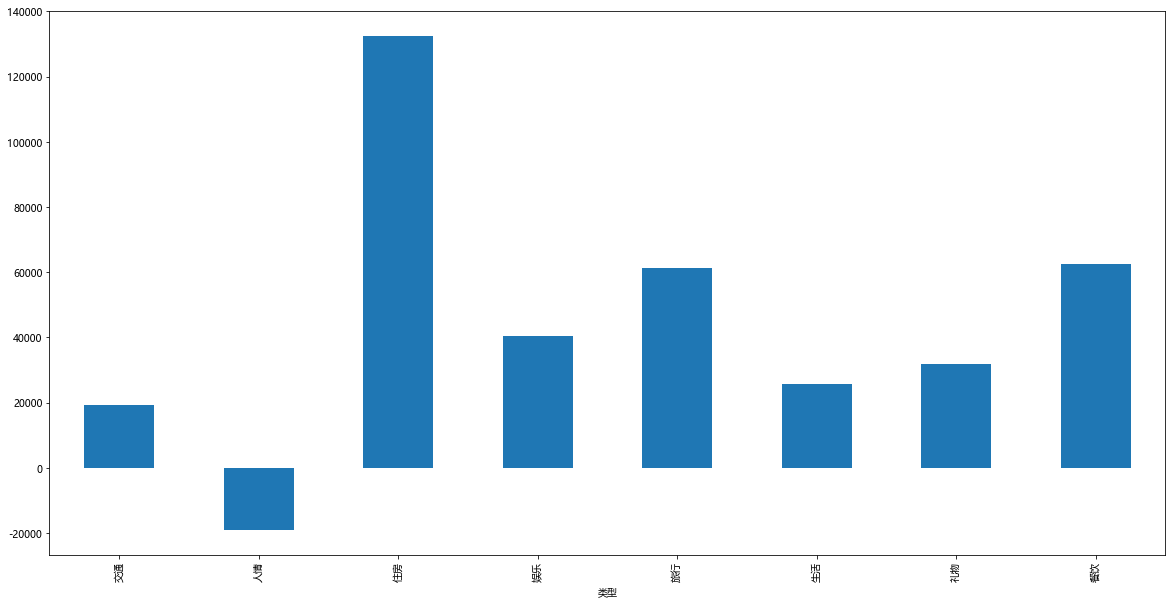

In [69]:
plt.figure(figsize=(20, 10))
type_result = -(table_payment.drop(["工资","月结余", "月支出", "交易"], axis=1).sum(axis=0))

type_result.plot(kind="bar")

<AxesSubplot:xlabel='月度'>

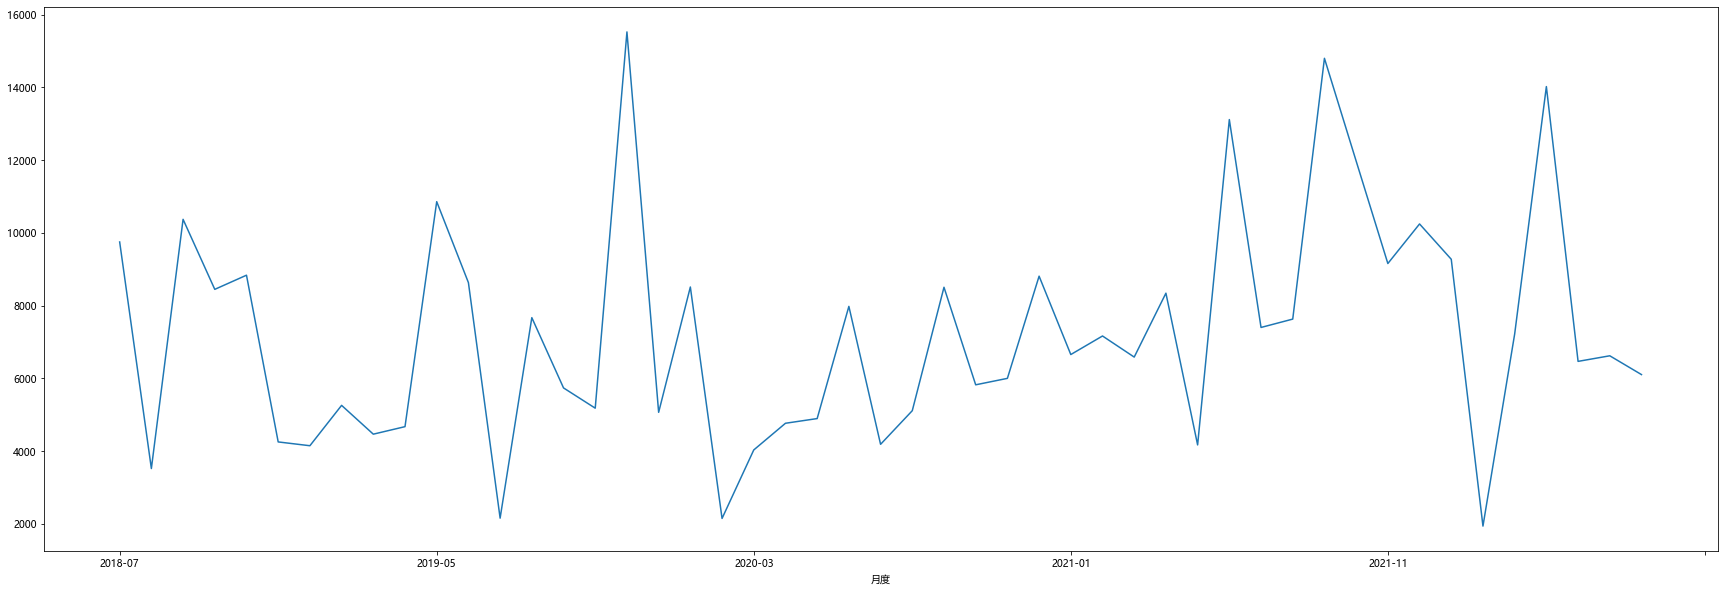

In [68]:
plt.figure(figsize=(30, 10))
monthly_result = abs(table_payment["月支出"])

monthly_result
monthly_result.plot(kind="line")
